# MNIST Digit Classification


Name: **Radhika Garg**

## Import Relevant Libraries

In [1]:
import os
import io
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import plotly.express as px

In [3]:
from sklearn.datasets import fetch_openml

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron, LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import hinge_loss
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_validate, cross_val_predict, GridSearchCV, train_test_split

from pprint import pprint

## Loading Data and Splitting

In [4]:
X_df, y_df = fetch_openml('mnist_784', version=1, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
X = X_df.to_numpy()
y = y_df.to_numpy()

In [6]:
X.shape

(70000, 784)

In [7]:
target_names = np.unique(y)
target_names

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [8]:
X.min(), X.max()

(0.0, 255.0)

In [9]:
X = MinMaxScaler().fit_transform(X)
print(f"Minimum: {X.min()}, Maximum: {X.max()}")

Minimum: 0.0, Maximum: 1.0


## Data Visualization

Let's Visualize some digits

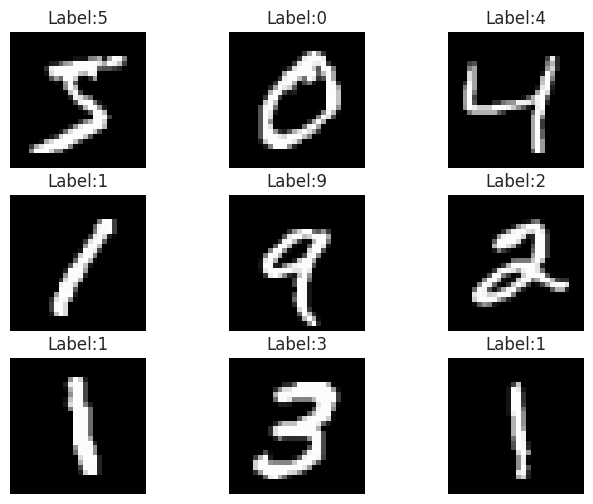

In [10]:
num_images = 9
factor = int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows=factor, ncols=factor, figsize=(8, 6))
idx_offset = 0
for i in range(factor):
    index = idx_offset + i * factor
    for j in range(factor):
        ax[i, j].imshow(X[index+j].reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f'Label:{str(y[index+j])}')
        ax[i, j].set_axis_off()

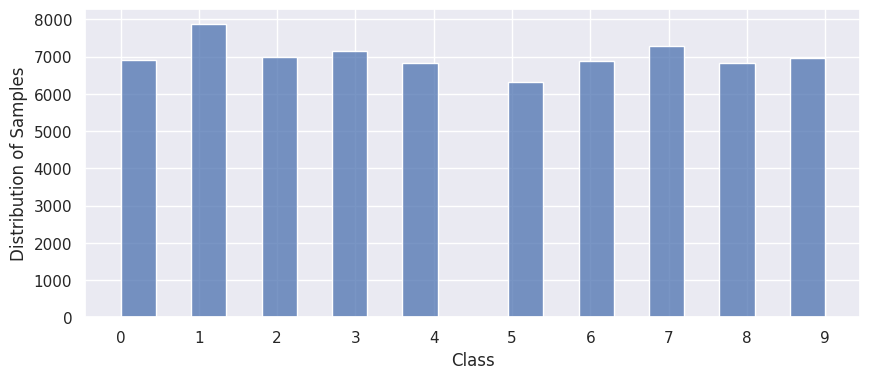

In [11]:
plt.figure(figsize=(10, 4))
sns.histplot(data=np.int8(y), binwidth=0.45, bins=11)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xlabel("Class")
plt.ylabel('Distribution of Samples')
plt.show()

We can see that all digits are around equally distributed. That is this is balanced data

### Data Splitting

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(56000, 784)

## Model

### Perceptron Model

In [14]:
pc_clf = Perceptron(max_iter=100, random_state=42)

In [15]:
pc_clf.fit(X_train, y_train)

Perceptron(max_iter=100, random_state=42)

In [16]:
print(pc_clf.coef_.shape)
print(pc_clf.intercept_)

(10, 784)
[ -92.  -19.  -37.  -78.  -33.   16.  -76.   -3. -167.  -86.]


In [17]:
pc_clf.score(X_train, y_train)

0.8950357142857143

In [18]:
y_hat_train = pc_clf.predict(X_train)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      5560
           1       0.97      0.96      0.97      6277
           2       0.85      0.91      0.88      5610
           3       0.79      0.90      0.84      5708
           4       0.95      0.88      0.91      5529
           5       0.85      0.85      0.85      5040
           6       0.95      0.93      0.94      5480
           7       0.93      0.92      0.92      5790
           8       0.85      0.80      0.82      5468
           9       0.86      0.84      0.85      5538

    accuracy                           0.90     56000
   macro avg       0.90      0.89      0.89     56000
weighted avg       0.90      0.90      0.90     56000



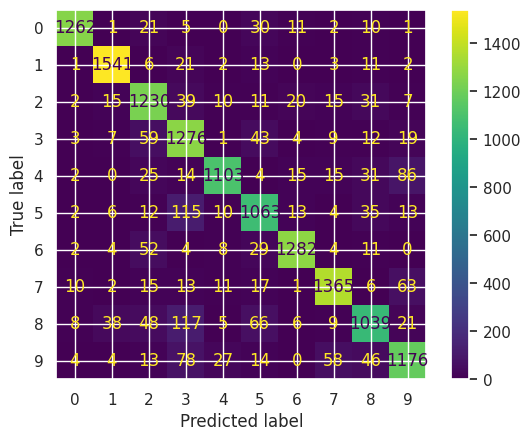

In [19]:
y_hat_test = pc_clf.predict(X_test)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_hat_test, values_format='.5g')
plt.show()

In [20]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1343
           1       0.95      0.96      0.96      1600
           2       0.83      0.89      0.86      1380
           3       0.76      0.89      0.82      1433
           4       0.94      0.85      0.89      1295
           5       0.82      0.84      0.83      1273
           6       0.95      0.92      0.93      1396
           7       0.92      0.91      0.91      1503
           8       0.84      0.77      0.80      1357
           9       0.85      0.83      0.84      1420

    accuracy                           0.88     14000
   macro avg       0.88      0.88      0.88     14000
weighted avg       0.88      0.88      0.88     14000



From above confusion matrix we can see our perceptron model miclassifies digits `2`, `3`, `5`, `9`, `7`.

In [21]:
bin_clf = Perceptron(random_state=42)
bin_clf.fit(X_train, y_train)
y_scores = bin_clf.decision_function(X_train)

In [22]:
plt.figure(figsize=(12, 8))
px.histogram(np.sort(y_scores), )
# plt.show()

Output hidden; open in https://colab.research.google.com to view.

Visualizaing sample data

In [23]:
tp_idx = np.random.choice(np.where(y_test == y_hat_test)[0], size=10)
fp_idx = np.random.choice(np.where(y_test != y_hat_test)[0], size=10)

In [24]:
idx = np.random.choice(np.concatenate((tp_idx, fp_idx)), size=10)
idx

array([3924, 3773, 4045, 3924, 4793, 4793, 3924, 8796, 4793, 5777])

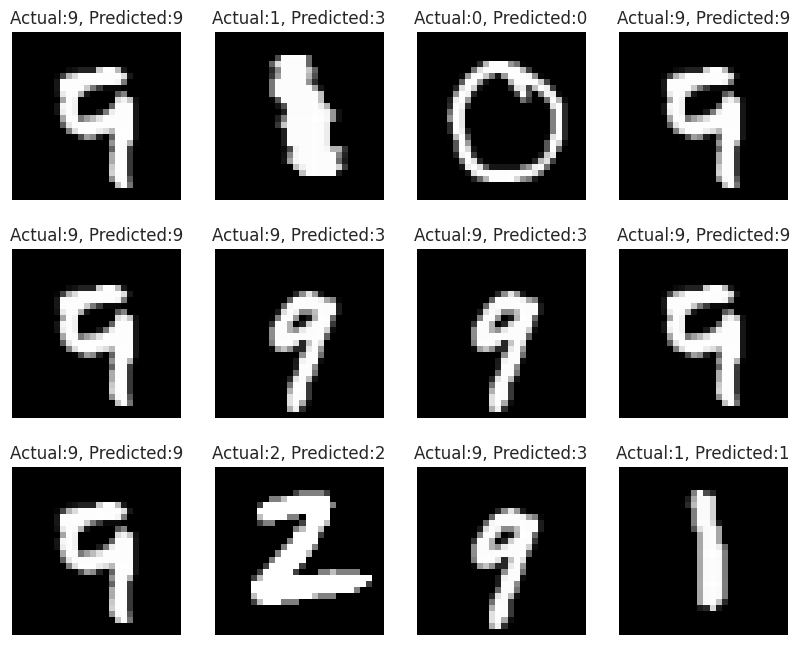

In [25]:
num_images = 9
factor = int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows=factor, ncols=factor+1, figsize=(10, 8))
idx_offset = 0
for i in range(factor):
    index = idx_offset + i * factor
    for j in range(factor+1):
        ax[i, j].imshow(X_test[idx[index+j]].reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f'Actual:{str(y_test[idx[index+j]])}, Predicted:{y_hat_test[idx[index+j]]}')
        ax[i, j].set_axis_off()

We can see there are missclassifications also

In [26]:
mlp = MLPClassifier(random_state=2)
mlp.fit(X_train, y_train)

print(mlp.score(X_test, y_test))

0.9745714285714285


In [27]:
y_hat_train = mlp.predict(X_train)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5560
           1       1.00      1.00      1.00      6277
           2       1.00      1.00      1.00      5610
           3       1.00      1.00      1.00      5708
           4       1.00      1.00      1.00      5529
           5       1.00      1.00      1.00      5040
           6       1.00      1.00      1.00      5480
           7       1.00      1.00      1.00      5790
           8       1.00      1.00      1.00      5468
           9       1.00      1.00      1.00      5538

    accuracy                           1.00     56000
   macro avg       1.00      1.00      1.00     56000
weighted avg       1.00      1.00      1.00     56000



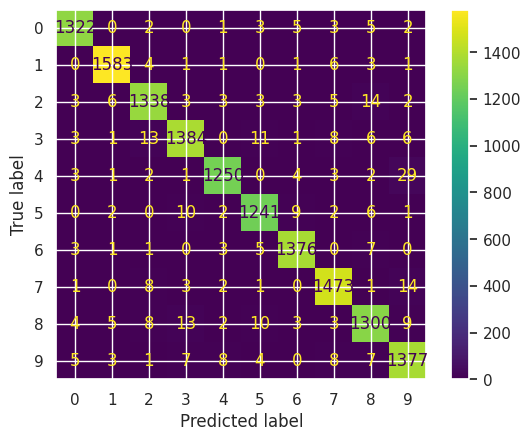

In [28]:
y_hat_test = mlp.predict(X_test)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_hat_test, values_format='.5g')
plt.show()

In [29]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.97      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.98      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.97      0.98      0.98      1503
           8       0.96      0.96      0.96      1357
           9       0.96      0.97      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [30]:
tp_idx = np.random.choice(np.where(y_test == y_hat_test)[0], size=10)
fp_idx = np.random.choice(np.where(y_test != y_hat_test)[0], size=10)
idx = np.random.choice(np.concatenate((tp_idx, fp_idx)), size=20)
# idx

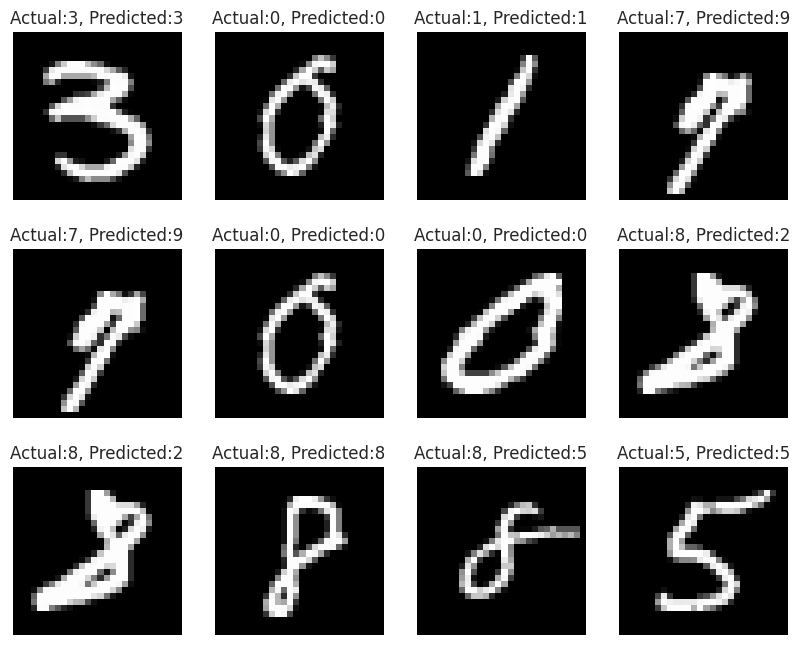

In [31]:
num_images = 9
factor = int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows=factor, ncols=factor+1, figsize=(10, 8))
idx_offset = 0
for i in range(factor):
    index = idx_offset + i * factor
    for j in range(factor+1):
        ax[i, j].imshow(X_test[idx[index+j]].reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f'Actual:{str(y_test[idx[index+j]])}, Predicted:{y_hat_test[idx[index+j]]}')
        ax[i, j].set_axis_off()

**We can see that our model predict well on test data**

In [32]:
print(mlp.coefs_[0].shape)
mlp.intercepts_[0].shape

(784, 100)


(100,)

We see that we have a 2-dimensional array of size 784 x 100. There are 100 nodes and 784 input values feeding into each node, and we have a weight for each of these connections.

### Visualizing Hidden Layer

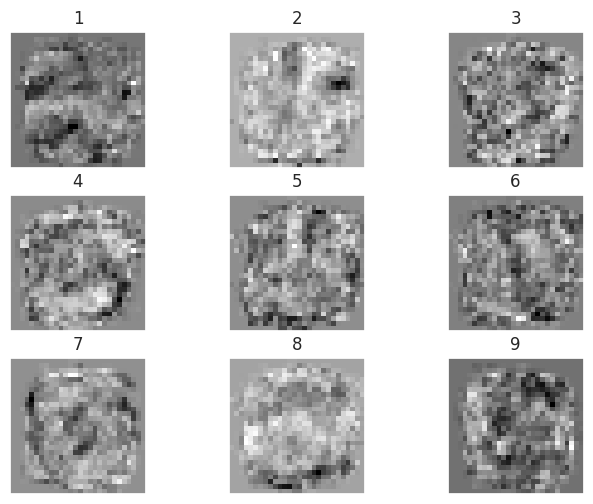

In [33]:
fig, axes = plt.subplots(3, 3, figsize=(8, 6))
for i, ax in enumerate(axes.ravel()):
    coef = mlp.coefs_[0][:, i]
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(i + 1)
plt.show()

While we can visualize the nodes in the hidden layer to understand on a high level what the neural network is doing, it is impossible to answer the question "Why did datapoint x get prediction y?" Since there are so many nodes, each with their own coefficients, it is not feasible to get a simple explanation of what the neural network is doing.